# スモールワールドネットワーク生成

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## NetworkXの組み込み関数より生成

NetworkXのwatts_strogatz_graph()より生成
Graph with 100 nodes and 200 edges
Number of nodes 100
Number of edges 200
Average degree 4.0
クラスタ係数： 0.38599999999999995


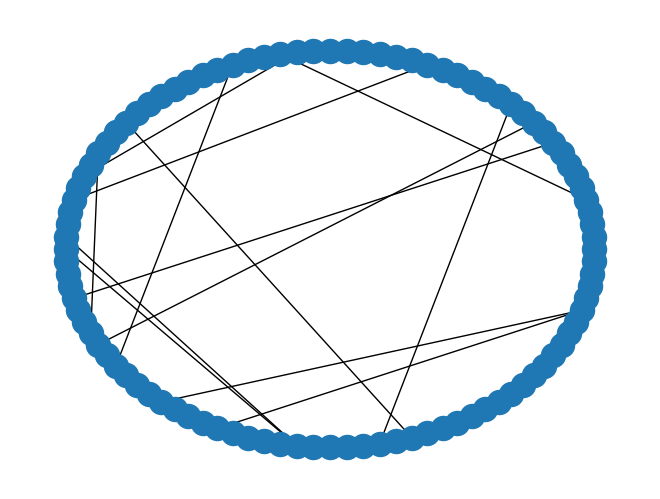

In [ ]:
n = 100 # ノード数
k = 4 # 次数
p = 0.1 # リンクつなぎ替え確率

print('NetworkXのwatts_strogatz_graph()より生成')
G1 = nx.watts_strogatz_graph(n, k, p)
pos = nx.circular_layout(G1)
#print(nx.info(G1)) # 種々の情報を出力
print(G1) # 種々の情報を出力
print('Number of nodes', len(G1.nodes))
print('Number of edges', len(G1.edges))
print('Average degree', sum(dict(G1.degree).values()) / len(G1.nodes))

print('クラスタ係数：', nx.average_clustering(G1)) # ネットワーク全体のクラスタ係数を出力
nx.draw(G1, pos)
plt.show()

## 自作関数で生成

自作関数による生成
Graph with 100 nodes and 200 edges
Number of nodes 100
Number of edges 200
Average degree 4.0
クラスタ係数： 0.3829999999999999


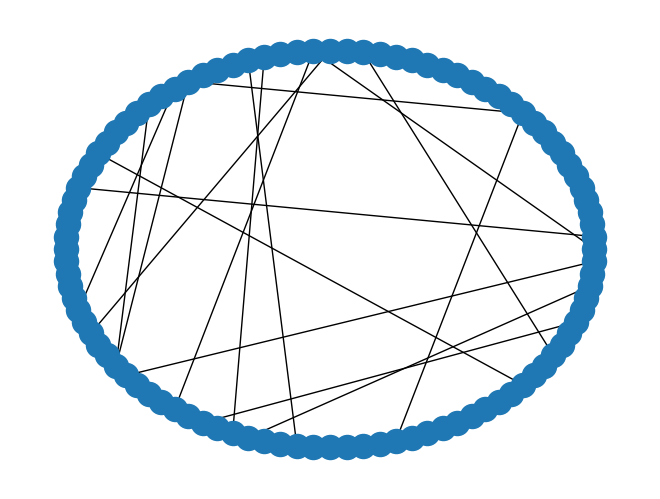

In [ ]:
# 自作のスモールワールドネットワーク生成関数
def gen_WS_network(n, k, p, seed=None):
    if seed is not None:
        np.random.seed(seed=seed)

    G = nx.Graph()
    G.add_nodes_from(list(range(n)))

    for i in range(n):
        for j in range(k//2):
            G.add_edge(i, (i+j+1)%n) # k/2本リンクを張る

    for (u,v) in G.edges():
        if np.random.rand() < p: # pの確率でつなぎ替え
            G.remove_edge(u, v)
            new_node = (u+np.random.randint(n-1)+1)%n # 新しい接続先としてu+1からu-1までの中からランダムに選ぶ
            while G.has_edge(u, new_node) == True: # 既存リンクは除外
                new_node = (u+np.random.randint(n-1)+1)%n
            G.add_edge(u, new_node)

    return G

n = 100
k = 4
p = 0.1

print('自作関数による生成')
G2 = gen_WS_network(n, k, p)
pos = nx.circular_layout(G2)
#print(nx.info(G2))
print(G2)
print('Number of nodes', len(G2.nodes))
print('Number of edges', len(G2.edges))
print('Average degree', sum(dict(G2.degree).values()) / len(G2.nodes))

print('クラスタ係数：', nx.average_clustering(G2))
nx.draw(G2, pos)
plt.show()

## 論文との比較

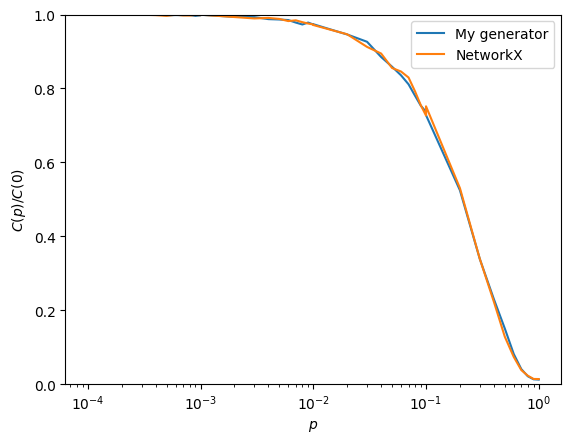

In [ ]:
n = 1000
k = 10

G01 = gen_WS_network(n, k, 0)
C01 = nx.average_clustering(G01)
G02 = nx.watts_strogatz_graph(n, k, 0)
C02 = nx.average_clustering(G02)

tmp = np.array(range(1,11))
parray = np.zeros(40)
parray[0:10]  = tmp/10000
parray[10:20] = tmp/1000
parray[20:30] = tmp/100
parray[30:40] = tmp/10

result1 = []
result2 = []

for p in parray:
    G1 = gen_WS_network(n, k, p)
    result1.append(nx.average_clustering(G1))
    G2 = nx.watts_strogatz_graph(n, k, p)
    result2.append(nx.average_clustering(G2))
result1 = np.array(result1) / C01
result2 = np.array(result2) / C02

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(parray, result1, label='My generator')
ax.plot(parray, result2, label='NetworkX')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$C(p)/C(0)$')
ax.set_ylim(0,1)
ax.set_xscale('log')
plt.legend()
plt.show()